### <b>실전 프로젝트 - 기본적인 기계학습 알고리즘을 활용한 풍경(Scene) 이미지 분류</b>

* 한 장의 풍경 이미지가 주어졌을 때, 어떠한 카테고리(category)에 속하는지 맞히는 <b>분류 모델</b>을 만드세요.
* 다음의 두 가지 기본적인 기계학습 알고리즘을 실습합니다.
    1. 선형 분류 모델(Linear Models for Classification)
    2. KNN (K-Nearest Neighbors)
* 본 프로젝트는 <b>총 8개의 문제</b>로 구성됩니다.
    * <b>Problem</b>이라고 명시된 부분의 소스코드만 작성합니다.
    * <b>알아보기</b>라고 명시된 부분은 단순히 읽고 실행하면 됩니다.
    * 단계적으로 문제를 풀어나가는 과정에서 분류 모델을 학습하는 기본적인 방법을 이해할 수 있습니다.

#### <b>Problem 1. 데이터셋 다운로드 및 분석하기</b>

* [Scene Classification 데이터셋 저장소](https://github.com/ndb796/Scene-Classification-Dataset)
    * 참고: [원본 Kaggle 데이터셋 링크](https://www.kaggle.com/nitishabharathi/scene-classification)
    * 본 데이터셋은 <b>저작권이 없는(No Copyright)</b> [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) 라이센스를 따라므로, 자유롭게 변형할 수 있습니다.
* 다음의 명령어를 이용해 데이터셋을 다운로드할 수 있습니다.

<pre>
# 깃허브에서 데이터셋 다운로드하기
!git clone https://github.com/ndb796/Scene-Classification-Dataset 
# 폴더 안으로 이동
%cd Scene-Classification-Dataset
</pre>

In [147]:
# 깃허브에서 데이터셋 다운로드하기
!git clone https://github.com/ndb796/Scene-Classification-Dataset
# 폴더 안으로 이동
%cd Scene-Classification-Dataset

c:\Users\user\cnu\Scene-Classification-Dataset


fatal: destination path 'Scene-Classification-Dataset' already exists and is not an empty directory.


#### <b>(알아보기) 데이터셋 설명</b>

* 장면(scene) 데이터셋은 24,335개의 다양한 자연 경치(scene) 이미지로 구성되어 있습니다.
* 총 6개의 클래스(class)로 구성됩니다.

<pre>
0. 빌딩(buildings)
1. 숲(forests)
2. 빙하(glacier)
3. 산(mountains)
4. 바다(sea)
5. 거리(street)
</pre>

* 각 이미지는 150 X 150 크기를 가집니다.
* 데이터셋 폴더 구성은 다음과 같습니다.

<pre>
Dataset/
    train-scene classification/
        train/ # 전체 이미지가 담긴 폴더입니다.
            0.jpg
            1.jpg
            2.jpg
            ...
            24333.jpg
            24334.jpg
        train.csv # 학습 이미지마다 클래스(class) 정보가 포함되어 있습니다.
    test_WyRytb0.csv # 최종 테스트(test) 이미지의 번호를 포함하며, 본 실습에서 사용하지 않습니다.
</pre>

#### <b>(알아보기) 학습 이미지 확인 방법</b>

* 학습할 데이터셋을 확인합니다.
* os 라이브러리의 os.listdir()를 이용하여 이미지 폴더에 존재하는 전체 파일 이름들을 확인할 수 있습니다.
* pandas 라이브러리의 read_csv()를 이용하여 train.csv 파일을 읽습니다.
    * 참고: [pandas의 기본 사용법](https://www.youtube.com/watch?v=9PF4BAFh-J8)

In [153]:
import os
import pandas as pd

path = 'train-scene classification/'

# 전체 이미지 개수 출력하기
file_list = os.listdir(path + 'train/')
print('전체 이미지의 개수:', len(file_list))

# 학습 이미지 확인하기
dataset = pd.read_csv(path + 'train.csv')
print('학습 이미지의 개수:', len(dataset))
print('학습 이미지별 클래스 정보')
dataset.head()

전체 이미지의 개수: 24335
학습 이미지의 개수: 17034
학습 이미지별 클래스 정보


,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


#### <b>Problem 2. 클래스별 학습 이미지 개수 출력하기</b>

* 클래스별 학습 이미지의 개수를 구하세요.
    * pandas 라이브러리의 데이터프레임(DataFrame)을 이용하면 매우 간단한 코드로 구현할 수 있습니다.
    * 예를 들어 label 컬럼(column)의 값이 3인 데이터의 개수는 다음과 같이 확인 가능합니다.
    * 참고: [pandas의 활용](https://www.youtube.com/watch?v=5ZiP4HRFBqU)

<pre>
my_frame[my_frame.label == 3]
</pre>

* 총 학습 이미지의 수는 17034개, 클래스의 개수는 6개입니다.
* <b>클래스 0</b>: 2628
* <b>클래스 1</b>: 2745
* <b>클래스 2</b>: 2957
* <b>클래스 3</b>: 3037
* <b>클래스 4</b>: 2784
* <b>클래스 5</b>: 2883

In [154]:
for i in sorted(dataset['label'].unique()):
    print("클래스 {}: {}".format(i,len(dataset[dataset['label']==i])))

클래스 0: 2628
클래스 1: 2745
클래스 2: 2957
클래스 3: 3037
클래스 4: 2784
클래스 5: 2883


#### <b>(알아보기) 특정한 이미지를 불러와 화면에 출력하기</b>

* PIL 라이브러리로 특정한 경로의 이미지를 불러와 numpy 객체로 만들 수 있습니다.

<pre>
img = np.asarray(Image.open(이미지 경로))
</pre>

* Numpy 객체는 matplotlib를 이용해 간단히 시각화할 수 있습니다.

<pre>
plt.imshow(img)
plt.show()
</pre>

* 원본 이미지의 크기가 너무 크므로, 모든 이미지를 64 X 64 X 3의 크기로 변경합니다.

이미지의 해상도: (64, 64, 3)


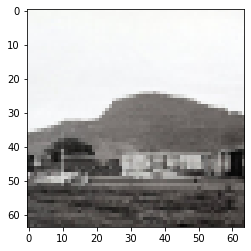

In [155]:
from skimage.transform import resize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open(path + 'train/' + file_list[0])
img = np.asarray(img)
img = resize(img, (64, 64, 3))
print('이미지의 해상도:', img.shape)

# 이미지 출력하기
plt.imshow(img)
plt.show()

#### <b>(알아보기) 학습/검증 데이터셋 나누는 방법</b>

* sklearn 라이브러리의 train_test_split()을 이용해 학습/검증 데이터셋을 구분합니다.
* 학습 이미지 데이터를 8:2의 비율로 학습(training)과 검증(validation) 데이터로 구분합니다.
* train_test_split() 함수의 주요 파라미터는 다음과 같습니다.
    * <b>test_size</b>: 테스트 데이터셋의 비율(default = 0.25)
    * <b>train_size</b>: 학습 데이터셋의 비율(default = 1 - test_size)
    * <b>shuffle</b>: 데이터를 분할할 때 자동으로 데이터 섞기(shuffle)를 수행합니다.

In [156]:
from sklearn.model_selection import train_test_split


train_dataset, val_dataset = train_test_split(dataset, test_size=0.2)

print('학습 데이터셋 크기:', len(train_dataset))
print('검증 데이터셋 크기:', len(val_dataset))

학습 데이터셋 크기: 13627
검증 데이터셋 크기: 3407


#### <b>Problem 3. 학습/검증 데이터셋 구성하기</b>

* 이미지는 별도의 폴더 안에 존재합니다.
* 모든 이미지를 읽어 와 <b>전체 이미지 데이터를 Numpy 객체로 구성</b>할 필요가 있습니다.
* 다음과 같이 X_train, y_train, X_test, y_test 변수의 shape이 구성되도록 소스코드를 작성하세요.
    * <b>X_train</b>: (13627, 64, 64, 3)
    * <b>y_train</b>: (13627,)
    * <b>X_test</b>: (3407, 64, 64, 3)
    * <b>y_test</b>: (3407,)
* <b>(힌트)</b> train_dataset의 image_name 컬럼과 label 컬럼을 한 줄에 하나씩 출력하는 방법은 다음과 같습니다.
    * 참고로 순서(index) 값 자체는 0부터 시작하지 않습니다.

<pre>
for index, row in train_dataset.iterrows():
    print(index, row['image_name'], row['label'])
</pre>

In [157]:

X_train=[]
y_train=[]

for index, row in train_dataset.iterrows():
    img=Image.open(path+'train/'+row['image_name'])
    img=np.asarray(img)
    img=resize(img,(64,64,3))
    X_train.append(img)
    y_train.append(row['label'])

X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=[]
y_test=[]

for index,row in val_dataset.iterrows():
    img=Image.open(path+'train/'+row['image_name'])
    img=np.asarray(img)
    img=resize(img,(64,64,3))
    X_test.append(img)
    y_test.append(row['label'])

X_test=np.array(X_test)
y_test=np.array(y_test)

#### <b>(Hint) 데이터셋 구성 확인하기</b>

* 정상적으로 데이터셋이 구성되었다면, 아래 코드의 실행 결과가 다음과 같아야 합니다.

<pre>
학습 이미지: (13627, 64, 64, 3)
학습 레이블: (13627,)
검증 이미지: (3407, 64, 64, 3)
검증 레이블: (3407,)
</pre>

In [ ]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_test.shape)
print('검증 레이블:', y_test.shape)

학습 이미지: (13627, 64, 64, 3)
학습 레이블: (13627,)
검증 이미지: (3407, 64, 64, 3)
검증 레이블: (3407,)


#### <b>(알아보기) 데이터셋 시각화 방법</b>

* 학습 데이터셋에 포함된 이미지를 시각화합니다.
* 각 클래스에 따른 이미지가 정확한지 확인합니다.
   * 예를 들어 빌딩(buildings) 컬럼에 있는 이미지는 전부 빌딩 이미지여야 합니다.

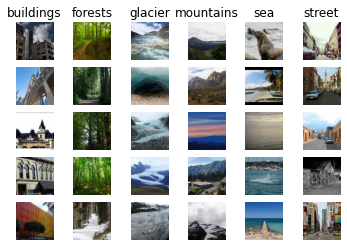

In [ ]:
# 데이터셋에서 각 클래스에 따른 일부 데이터를 시각화합니다.
classes = ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']
# 각 클래스마다 특정 개수의 이미지를 출력합니다.
samples_per_class = 5


# 데이터 시각화 함수 구현
def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes): # 각 클래스를 (클래스, 클래스명) 형식으로 순회
        idxs = np.flatnonzero(y_train == y) # 해당 클래스를 갖는(True 값을 갖는) 데이터 인덱스 계산
        idxs = np.random.choice(idxs, samples_per_class, replace=False) # 특정 개수만큼 무작위로 선택
        for i, idx in enumerate(idxs): # 하나씩 이미지를 확인하며
            plt_idx = i * num_classes + y + 1 # 이미지를 출력할 위치: 각 열(column)에 차례대로 출력하도록 설정
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx])
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

visualize_data(X_train, classes, samples_per_class)

#### <b>Problem 4. 학습/검증 데이터셋 전처리</b>

* 선형 모델(linear model)을 학습할 예정이므로, 각 이미지를 벡터로 변경합니다.
* 다음과 같이 X_train, y_train, X_test, y_test 변수의 shape이 구성되도록 소스코드를 작성하세요.
    * <b>X_train</b>: (13627, 12288)
    * <b>y_train</b>: (13627,)
    * <b>X_test</b>: (3407, 12288)
    * <b>y_test</b>: (3407,)
* 본 실습에서는 <b>데이터 정규화(normalization)</b>을 수행하지 않습니다.

In [158]:
X_train=np.reshape(X_train,(X_train.shape[0],-1))
X_test=np.reshape(X_test,(X_test.shape[0],-1))

#### <b>(Hint) 데이터셋 구성 확인하기</b>

* 정상적으로 데이터셋이 구성되었다면, 아래 코드의 실행 결과가 다음과 같아야 합니다.

<pre>
학습 이미지: (13627, 12288)
학습 레이블: (13627,)
검증 이미지: (3407, 12288)
검증 레이블: (3407,)
</pre>

In [ ]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_test.shape)
print('검증 레이블:', y_test.shape)

학습 이미지: (13627, 12288)
학습 레이블: (13627,)
검증 이미지: (3407, 12288)
검증 레이블: (3407,)


#### <b>(알아보기) Logistic Regression 라이브러리를 이용한 선형 분류 모델 학습 방법</b>

* sklearn.linear_model에서 제공하는 LogisticRegression을 이용합니다.
    * 참고: [LogisticRegression 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
    * 기본적으로 GPU를 지원하지 않기 때문에, 학습 속도가 느릴 수 있습니다.
* LogisticRegression의 주요 파라미터는 다음과 같습니다.
    * <b>penalty</b>: 정규화(normalization) 목적으로 사용할 norm을 명시(default='l2')
    * <b>solver</b>: 최적화(optimization)을 진행할 때 사용할 알고리즘(default='lbfgs') 
    * <b>max_iter</b>: 수렴(convergence)을 위해 반복할 횟수(default=100)
    * <b>multi_class</b>: 클래스(class)의 개수가 여러 개인지 확인(default='auto')
    * <b>verbose</b>: 자세한 학습 결과를 표시할지의 여부(default=0)

* 예를 들어 10번의 반복(iteration)을 수행하여 학습하는 코드는 다음과 같습니다.

<pre>
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10)
model.fit(X_train, y_train)
</pre>

* 너무 적은 횟수로 반복하여 수렴이 되지 않은 경우에는 다음과 같은 경고(warning) 메시지가 출력될 수 있습니다.
    * 이때 max_iter의 값을 증가시킴으로써 경고 메시지가 나오지 않도록 할 수 있습니다.
    * 생각해 보기: 완전히 수렴하도록 만드는 것이 성능 향상에 도움이 될까요?

<pre>
ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
</pre>

In [ ]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time() # 시작 시간

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=100)
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 32.72550296783447


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### <b>(알아보기) 학습된 모델의 정확도 계산 방법</b>

* 학습된 LogisticRegression 모델의 정확도를 평가합니다.
* accuracy_score 메서드를 이용할 수 있습니다.

In [ ]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.6079841491157262
검증 데이터셋 정확도: 0.5347813325506311
클래스: [0 1 2 3 4 5]
반복 횟수: [100]
학습된 가중치 크기: (6, 12288)


#### <b>(알아보기) 개별 이미지에 대하여 판별 수행</b>

* 몇 개의 이미지에 대하여 판별을 수행한 결과를 출력할 수 있습니다.

<pre>
0. 빌딩(buildings)
1. 숲(forests)
2. 빙하(glacier)
3. 산(mountains)
4. 바다(sea)
5. 거리(street)
</pre>

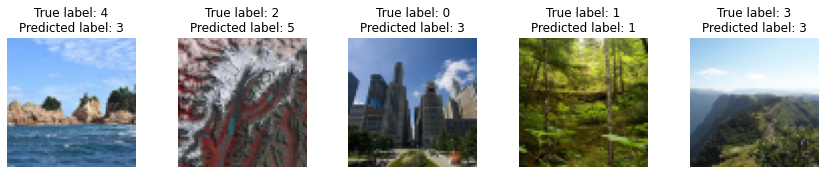

In [ ]:
max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_test[:max_cnt], y_test[:max_cnt], model.predict(X_test[:max_cnt])):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

#### <b>(알아보기) 혼동 행렬 시각화하기</b>

* 참고: [Seaborn.heatmap 공식 문서](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 
* 각 클래스에 대하여 정확히 분류하는지 확인하기 위해 혼동 행렬(confusion matrix)을 생성할 수 있습니다.
* 생각해 보기: 어떤 클래스에 대하여 가장 분류 정확도가 떨어지나요? 그 이유는 무엇이라고 생각하나요?

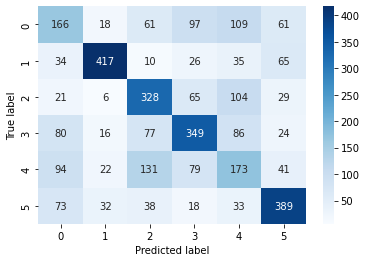

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns     

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# Seaborn heatmeap을 이용하여 화면에 출력하기
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.show()

#### <b>Problem 5. Logistic Regression 모델의 성능 평가하기</b>

* 다음의 코드를 실행하여 실행 결과를 정리하세요.
    * 실행 결과는 매 번 달라질 수 있습니다.
* 반복 횟수가 10일 때
    * 학습 데이터셋 정확도: {답을 쓰세요.}
    * 검증 데이터셋 정확도: {답을 쓰세요.}
* 반복 횟수가 30일 때
    * 학습 데이터셋 정확도: {답을 쓰세요.}
    * 검증 데이터셋 정확도: {답을 쓰세요.}
* 반복 횟수가 50일 때
    * 학습 데이터셋 정확도: {답을 쓰세요.}
    * 검증 데이터셋 정확도: {답을 쓰세요.}
* 반복 횟수가 100일 때
    * 학습 데이터셋 정확도: {답을 쓰세요.}
    * 검증 데이터셋 정확도: {답을 쓰세요.}
* 반복 횟수가 200일 때
    * 학습 데이터셋 정확도: {답을 쓰세요.}
    * 검증 데이터셋 정확도: {답을 쓰세요.}
* 반복 횟수가 300일 때
    * 학습 데이터셋 정확도: {답을 쓰세요.}
    * 검증 데이터셋 정확도: {답을 쓰세요.}
* 반복 횟수가 많을 수록 검증 성능이 좋아지나요? {답을 쓰세요.}
    * 그 이유는: {답을 쓰세요.}

In [ ]:
from sklearn.linear_model import LogisticRegression


for iter in [10, 30, 50, 100, 200, 300]:
    start_time = time.time() # 시작 시간

    model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
    model.fit(X_train, y_train)

    print("====================================================")
    print(f'[학습 완료(max_iter={iter})]')

    y_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred)
    print('학습 데이터셋 정확도:', train_acc)

    y_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=10)]
학습 데이터셋 정확도: 0.46598664416232477
검증 데이터셋 정확도: 0.46903434106251835
소요된 시간(초 단위): 4.7173871994018555


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=30)]
학습 데이터셋 정확도: 0.5381228443531225
검증 데이터셋 정확도: 0.5429997064866452
소요된 시간(초 단위): 12.386084079742432


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=50)]
학습 데이터셋 정확도: 0.5597710427827108
검증 데이터셋 정확도: 0.5441737599060757
소요된 시간(초 단위): 18.917420387268066


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=100)]
학습 데이터셋 정확도: 0.6079841491157262
검증 데이터셋 정확도: 0.5347813325506311
소요된 시간(초 단위): 35.537052392959595


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=200)]
학습 데이터셋 정확도: 0.6765979305789975
검증 데이터셋 정확도: 0.5145289110654535
소요된 시간(초 단위): 70.0457215309143


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=300)]
학습 데이터셋 정확도: 0.7291406765979306
검증 데이터셋 정확도: 0.49721162312885236
소요된 시간(초 단위): 100.89733099937439


#### <b>(알아보기) 데이터 증진(Data augmentation): Shift와 Flip</b>

* 데이터 증진 함수를 다음과 같이 구현할 수 있습니다.
    * <b>이동(shift)</b>: 이미지를 이동시킵니다.
    * <b>뒤집기(flip)</b>: 이미지를 상하 혹은 좌우 반전시킵니다.

In [159]:
from scipy.ndimage.interpolation import shift


def shift_image(image, dx, dy):
    image = image.reshape((64, 64, 3))
    # dy, dx는 각각 너비, 높이 기준으로 이동할 크기
    shifted_image = shift(image, [dy, dx, 0])
    return shifted_image.reshape([-1])


def horizontal_flip(image):
    image = image.reshape((64, 64, 3))
    # 수직 반전(vertical flip): axis=0, 수평 반전(horizontal flip): axis=1
    flipped_image = np.flip(image, axis=1)
    return flipped_image.reshape([-1])

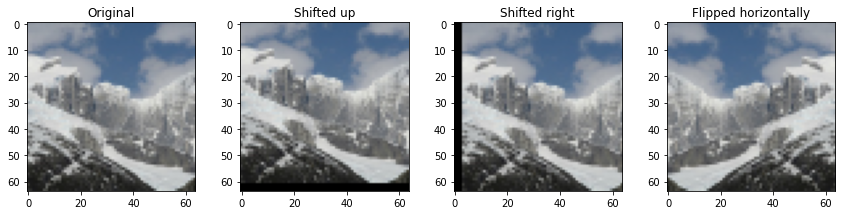

In [160]:
# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(12, 4)
fig.tight_layout()

image = X_train[0]
shifted_image_up = shift_image(image, 0, -3)
shifted_image_right = shift_image(image, 3, 0)
flipped_image = horizontal_flip(image)

# 출력할 때는 이미지 해상도에 맞게 재변형
axes[0].imshow(np.reshape(image, (64, 64, 3)))
axes[0].set_title('Original')
axes[1].imshow(np.reshape(shifted_image_up, (64, 64, 3)))
axes[1].set_title('Shifted up')
axes[2].imshow(np.reshape(shifted_image_right, (64, 64, 3)))
axes[2].set_title('Shifted right')
axes[3].imshow(np.reshape(flipped_image, (64, 64, 3)))
axes[3].set_title('Flipped horizontally')

plt.show()

#### <b>Problem 6. 데이터 전처리를 활용하여 선형 모델의 분류 성능 높이기</b>

* 마찬가지로 LinearRegression을 사용하는 상태에서, 데이터 전처리만 적용하여 성능을 높이는 방법을 찾아 보세요.
    * 데이터 증진(data augmentation)
    * (옵션) 데이터 정규화(normalization)
* LinearRegression에서 학습 횟수(max_iter)와 같은 파라미터는 자유롭게 변경해도 됩니다.
* 검증 정확도(validation accuracy)를 <b>최소 55% 이상</b>으로 만드세요.
* <b>데이터 증진(data augmentation)</b> 적용 예시
    * 단, 아래 방식으로 데이터 증진을 과도하게 적용하는 경우에는 메모리 부족으로 세션이 다운될 수 있습니다.

<pre>
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# 이미지를 하나씩 확인하며 변형된 이미지 추가
cnt = 0
for image, label in zip(X_train, y_train):
    dx = random.uniform(1, 3)
    dy = random.uniform(1, 3)
    X_train_augmented.append(shift_image(image, dx, dy))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 증진된 데이터들을 섞기(shuffle)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]
</pre>

* <b>(옵션) 데이터 정규화(data normalization)</b>
    * 원하는 경우 데이터 정규화를 적용할 수 있습니다.
    * 참고로 데이터 정규화를 적용하는 경우 검증(validation) 데이터에도 적용해야 합니다.

<pre>
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train_augmented)

X_train_augmented = scaler.transform(X_train_augmented)
X_val = scaler.transform(X_val)
</pre>

In [161]:
X_train_augmented=[image for image in X_train]
y_train_augmented=[label for label in y_train]

for image,label in zip(X_train,y_train):
    dx=np.random.uniform(1,3)
    dy=np.random.uniform(1,3)
    X_train_augmented.append(shift_image(image,dx,dy))
    y_train_augmented.append(label)
    X_train_augmented.append(horizontal_flip(image))
    y_train_augmented.append(label)

X_train_augmented=np.array(X_train_augmented)
y_train_augmented=np.array(y_train_augmented)

shuffle_idx=np.random.permutation(len(X_train_augmented))
X_train_augmented=X_train_augmented[shuffle_idx]
y_train_augmented=y_train_augmented[shuffle_idx]

#### <b>(Hint) 학습 완료된 모델 확인하기</b>

* 데이터 증진 및 하이퍼 파라미터가 효과적으로 설정되었다면, <b>검증 데이터셋 정확도가 55% 이상</b> 나오는 것이 가능합니다.
    * 검증 정확도를 55% 이상으로 만드세요.

In [ ]:
y_pred = model.predict(X_train_augmented)
train_acc = accuracy_score(y_train_augmented, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.5730779579755877
검증 데이터셋 정확도: 0.5594364543586733
클래스: [0 1 2 3 4 5]
반복 횟수: [100]
학습된 가중치 크기: (6, 12288)


In [ ]:
from sklearn.linear_model import LogisticRegression

best_acc=0
best_iter=0
for iter in [10, 30, 50, 100, 200, 300]:
    start_time = time.time() # 시작 시간

    model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
    model.fit(X_train_augmented, y_train_augmented)

    print("====================================================")
    print(f'[학습 완료(max_iter={iter})]')

    y_pred = model.predict(X_train_augmented)
    train_acc = accuracy_score(y_train_augmented, y_pred)
    print('학습 데이터셋 정확도:', train_acc)

    y_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, y_pred)
    print('검증 데이터셋 정확도:', val_acc)
    if best_acc<val_acc:
        best_acc=val_acc
        best_iter=iter
    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

print(best_acc,best_iter)

c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=10)]
학습 데이터셋 정확도: 0.46175484944106066
검증 데이터셋 정확도: 0.4746110948048136
소요된 시간(초 단위): 15.354321479797363


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=30)]
학습 데이터셋 정확도: 0.5345515031432695
검증 데이터셋 정확도: 0.5465218667449369
소요된 시간(초 단위): 36.25607347488403


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=50)]
학습 데이터셋 정확도: 0.5495707052175828
검증 데이터셋 정확도: 0.5456413266803639
소요된 시간(초 단위): 54.658350229263306


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=100)]
학습 데이터셋 정확도: 0.5730779579755877
검증 데이터셋 정확도: 0.5594364543586733
소요된 시간(초 단위): 99.61651515960693


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=200)]
학습 데이터셋 정확도: 0.5970499743156967
검증 데이터셋 정확도: 0.554740240680951
소요된 시간(초 단위): 200.1957302093506


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=300)]
학습 데이터셋 정확도: 0.6195787774271666
검증 데이터셋 정확도: 0.550631053712944
소요된 시간(초 단위): 310.04440355300903
0.5594364543586733 100


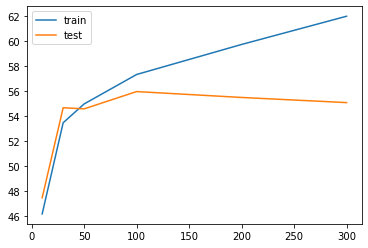

In [ ]:
train_result=[0.46175484944106066,0.5345515031432695,0.5495707052175828,0.5730779579755877,0.5970499743156967,0.6195787774271666]
test_result=[0.4746110948048136,0.5465218667449369,0.5456413266803639,0.5594364543586733,0.554740240680951,0.550631053712944]
max_iters=[10,30,50,100,200,300]

plt.plot(max_iters,[i*100 for i in train_result])
plt.plot(max_iters,[i*100 for i in test_result])
plt.legend(["train", "test"])

plt.show()

In [ ]:
model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=best_iter)
model.fit(X_train_augmented, y_train_augmented)

c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_train_augmented)
train_acc = accuracy_score(y_train_augmented, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.5730779579755877
검증 데이터셋 정확도: 0.5594364543586733
클래스: [0 1 2 3 4 5]
반복 횟수: [100]
학습된 가중치 크기: (6, 12288)


#### <b>Problem 7. KNN 모델 평가 및 성능 높이기</b>

* 이번에는 KNN 모델을 이용하여 분류(classification)를 진행해 봅시다.
* 아래 소스 코드를 자유롭게 변형하여 <b>검증 정확도(validation accuracy)를 최대한으로 높이는 것이 목표</b>입니다.

1. <b>자신만의 거리 메트릭(metric)을 추가</b>해 보세요. 현재는 L1_distance(), L2_distance()만 존재합니다.
    * <b>(예시)</b> L1과 L2 거리(distance)를 섞은 나만의 거리 메트릭
2. 데이터 증진(data augmentation)을 포함해 다양한 기법을 자유롭게 적용해도 됩니다.
    * <b>(주의)</b> 메모리가 초과되면 세션이 다운될 수 있습니다.
* <b>내가 얻은 최고의 검증 정확도</b>: {답을 쓰세요.}

In [162]:
from collections import Counter


class kNearestNeighbors(object):
    def __init__(self):
        pass

    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def L1_distance(self, x):
        distances = np.sum(np.abs(self.X_train - x), axis=1)
        return distances
    
    def L2_distance(self, x):
        distances = np.sqrt(np.sum(np.square(self.X_train - x), axis=1))
        return distances

    def predict(self, X_val, k, distance):
        num_val = X_val.shape[0]
        y_pred = np.zeros((num_val), dtype=int)

        for i in range(num_val):
            shortest = []
            # 각 검증 이미지(i번째 이미지)마다 모든 학습 이미지와의 거리 계산
            if distance == 'L1':
                distances = self.L1_distance(X_val[i, :])
            if distance == 'L2':
                distances = self.L2_distance(X_val[i, :])
            min_indices = np.argsort(distances) # 가까운 학습 이미지 순으로 정렬
            shortest=shortest+list(self.y_train[min_indices[:k]])

            y_pred[i] = Counter(shortest).most_common(1)[0][0] # 가장 많이 등장한 레이블(label) 계산
        return y_pred

#### <b>(알아보기) 하이퍼 파라미터 찾기</b>

* distance와 k의 값을 적절히 조절하여 <b>가장 성능이 우수한 파라미터를 찾을 필요</b>가 있습니다.
* 전체 검증 데이터는 3,000개 이상이므로 많은 시간이 소요될 수 있습니다.
    * 따라서 하이퍼 파라미터를 찾을 때는 200개의(일부의) 평가 데이터만 이용하는 것을 추천합니다.
    * 아래 코드는 k=7, 거리(distance) 메트릭으로는 L2를 사용한 코드 예시입니다.

In [163]:
knn = kNearestNeighbors()
knn.train(X_train[:len(X_train)//2], y_train[:len(X_train)//2])

검증 데이터셋 정확도: 0.455
소요된 시간(초 단위): 146.35444045066833


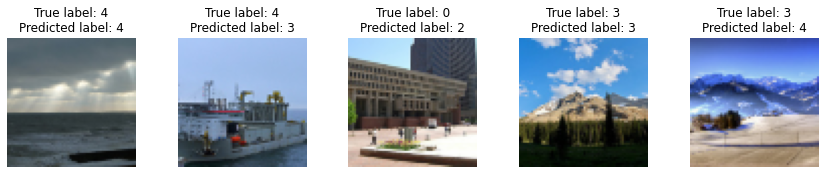

In [164]:
start_time = time.time() # 시작 시간
number = 200
X_val_small = X_test[:number]
y_val_small = y_test[:number]

y_pred = knn.predict(X_val_small, k=7, distance='L2')
val_acc = accuracy_score(y_val_small, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
print("====================================================")

max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_val_small[:max_cnt], y_val_small[:max_cnt], y_pred[:max_cnt]):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

In [166]:
from itertools import product
import time

number = 50
X_val_small = X_test[:number]
y_val_small = y_test[:number]


best_parameter=[]
best_acc=0
params=product(list(range(7,21,2)),['L1','L2'])

for k,d in params:
    start_time = time.time()
    print("k=",k, "distance=",d,"로 검증 시작")
    y_pred=knn.predict(X_val_small,k=k,distance=d)
    val_acc=accuracy_score(y_val_small,y_pred)
    if val_acc>best_acc:
        best_acc=val_acc
        best_parameter=[k,d]
    
    print('검증 데이터셋 정확도:', val_acc)
    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")


k= 7 distance= L1 로 검증 시작
검증 데이터셋 정확도: 0.46
소요된 시간(초 단위): 35.61230993270874
k= 7 distance= L2 로 검증 시작
검증 데이터셋 정확도: 0.38
소요된 시간(초 단위): 34.88024139404297
k= 9 distance= L1 로 검증 시작
검증 데이터셋 정확도: 0.42
소요된 시간(초 단위): 34.22302579879761
k= 9 distance= L2 로 검증 시작
검증 데이터셋 정확도: 0.4
소요된 시간(초 단위): 34.85806131362915
k= 11 distance= L1 로 검증 시작
검증 데이터셋 정확도: 0.46
소요된 시간(초 단위): 35.122053384780884
k= 11 distance= L2 로 검증 시작
검증 데이터셋 정확도: 0.36
소요된 시간(초 단위): 35.695828914642334
k= 13 distance= L1 로 검증 시작
검증 데이터셋 정확도: 0.5
소요된 시간(초 단위): 34.76617908477783
k= 13 distance= L2 로 검증 시작
검증 데이터셋 정확도: 0.38
소요된 시간(초 단위): 36.55311298370361
k= 15 distance= L1 로 검증 시작
검증 데이터셋 정확도: 0.5
소요된 시간(초 단위): 36.347031354904175
k= 15 distance= L2 로 검증 시작
검증 데이터셋 정확도: 0.4
소요된 시간(초 단위): 34.126009464263916
k= 17 distance= L1 로 검증 시작
검증 데이터셋 정확도: 0.52
소요된 시간(초 단위): 36.004782915115356
k= 17 distance= L2 로 검증 시작
검증 데이터셋 정확도: 0.46
소요된 시간(초 단위): 35.4748101234436
k= 19 distance= L1 로 검증 시작
검증 데이터셋 정확도: 0.48
소요된 시간(초 단위): 33.78181791305542
k= 

In [168]:
print(best_parameter)

[17, 'L1']


In [174]:
start_time = time.time()

y_pred=knn.predict(X_test,k=best_parameter[0],distance=best_parameter[1])
val_acc=accuracy_score(y_test,y_pred)

print('검증 데이터셋 정확도:', val_acc)
print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
print("====================================================")

검증 데이터셋 정확도: 0.48752568241855004
소요된 시간(초 단위): 2388.4717233181


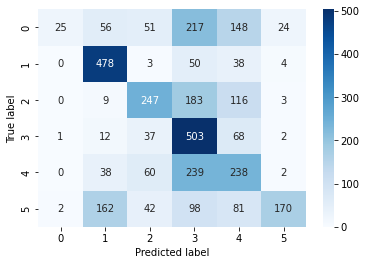

In [175]:
from sklearn.metrics import confusion_matrix
import seaborn as sns     

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# Seaborn heatmeap을 이용하여 화면에 출력하기
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.show()

#### <b>(알아보기) 커스텀 데이터셋 찾기</b>

* 다양한 웹 사이트에서 데이터셋을 다운로드할 수 있습니다.
    * Roboflow 공공(public) 데이터셋: https://public.roboflow.com/classification
    * 캐글(Kaggle) 데이터셋: https://www.kaggle.com/datasets

* 다음과 같이 사이트에 방문하여 데이터셋을 둘러볼 수 있습니다.
* Roboflow에서는 Jupyter Notebook에서 바로 적용 가능한 데이터셋 다운로드 코드를 제공합니다.

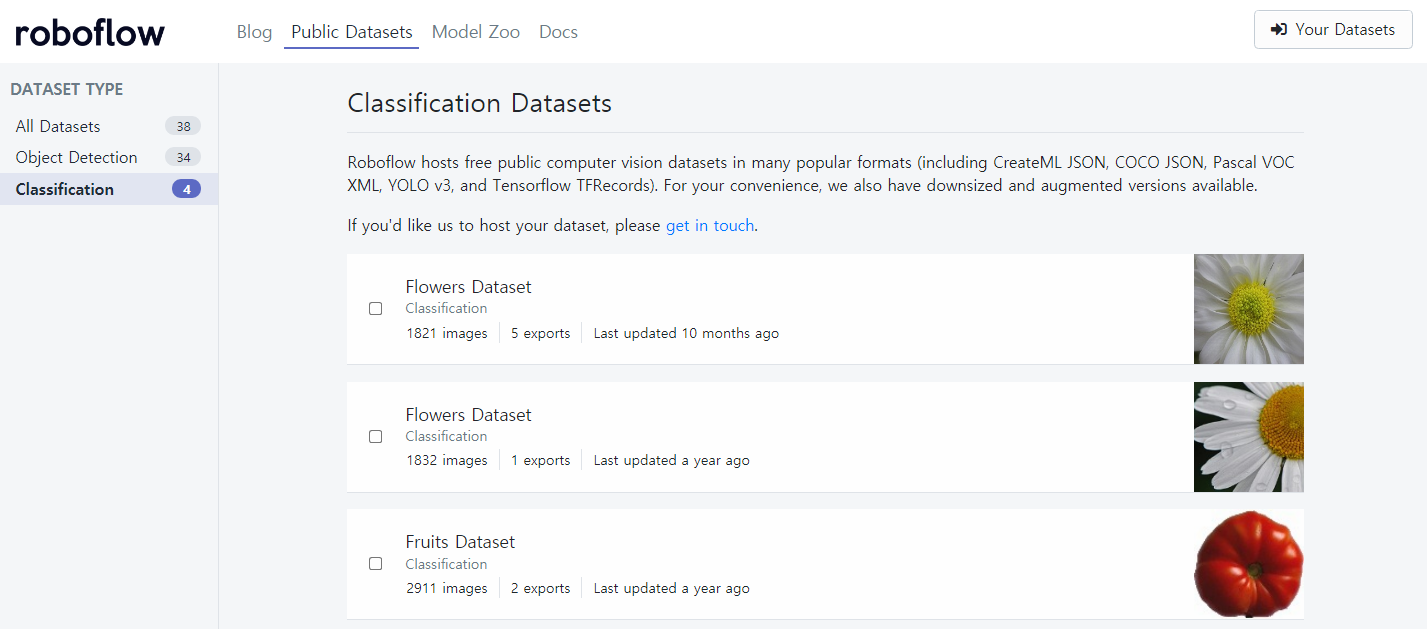

#### <b>Problem 8. 커스텀 데이터셋 분류해 보기</b>

* 자신만의 커스텀 데이터셋을 준비하여 분류(classification) 모델을 학습해 봅시다.
* 아래쪽 코드는 완전히 자유롭게 작성하시면 됩니다.

In [ ]:
import pandas as pd

datapath="./data/sportimage/"
file_list = os.listdir(datapath + 'train/')
dataset = pd.read_csv(datapath + 'sports.csv')

In [ ]:
dataset.head()

,filepaths,labels,data set
0,train/air hockey/001.jpg,air hockey,train
1,train/air hockey/002.jpg,air hockey,train
2,train/air hockey/003.jpg,air hockey,train
3,train/air hockey/004.jpg,air hockey,train
4,train/air hockey/005.jpg,air hockey,train


이미지의 해상도: (128, 128, 3)


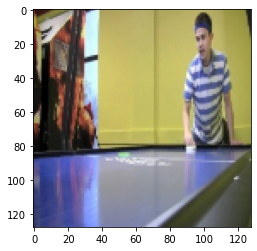

In [ ]:
from skimage.transform import resize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open(datapath + dataset.iloc[0]['filepaths'])
img = np.asarray(img)
img = resize(img, (128, 128, 3))
print('이미지의 해상도:', img.shape)

# 이미지 출력하기
plt.imshow(img)
plt.show()

In [ ]:
#class 제한. 랜덤하게 10개 클래스만 학습하기.
import random
available_labels=list(dataset['labels'].unique())
available_labels=random.sample(available_labels,10)

In [ ]:
train_dataset=dataset[(dataset['data set']=="train") & (dataset['labels'].isin(available_labels))]
test_dataset=dataset[(dataset['data set']=="test") & (dataset['labels'].isin(available_labels))]


print('학습 데이터셋 크기:', len(train_dataset))
print('검증 데이터셋 크기:', len(test_dataset))

학습 데이터셋 크기: 1417
검증 데이터셋 크기: 50


In [ ]:
X_train=[]
y_train=[]

for index, row in train_dataset.iterrows():
    img=Image.open(datapath+row['filepaths'])
    img=np.asarray(img)
    img=resize(img,(64,64,3))
    X_train.append(img)
    y_train.append(row['labels'])

X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=[]
y_test=[]

for index,row in test_dataset.iterrows():
    img=Image.open(datapath+row['filepaths'])
    img=np.asarray(img)
    img=resize(img,(64,64,3))
    X_test.append(img)
    y_test.append(row['labels'])

X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_test.shape)
print('검증 레이블:', y_test.shape)

학습 이미지: (1417, 64, 64, 3)
학습 레이블: (1417,)
검증 이미지: (50, 64, 64, 3)
검증 레이블: (50,)


In [ ]:
classes = list(train_dataset['labels'].unique())
print(classes)
print(len(classes))

['bmx', 'bobsled', 'figure skating pairs', 'horse racing', 'jai alai', 'judo', 'parallel bar', 'rings', 'speed skating', 'water polo']
10


In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],-1))
X_test=np.reshape(X_test,(X_test.shape[0],-1))

In [ ]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time() # 시작 시간

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=100)
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 5.567088603973389


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.9957657021877205
검증 데이터셋 정확도: 0.54
클래스: ['bmx' 'bobsled' 'figure skating pairs' 'horse racing' 'jai alai' 'judo'
 'parallel bar' 'rings' 'speed skating' 'water polo']
반복 횟수: [100]
학습된 가중치 크기: (10, 12288)


In [ ]:
from scipy.ndimage.interpolation import shift


def shift_image(image, dx, dy):
    image = image.reshape((64, 64, 3))
    # dy, dx는 각각 너비, 높이 기준으로 이동할 크기
    shifted_image = shift(image, [dy, dx, 0])
    return shifted_image.reshape([-1])


def horizontal_flip(image):
    image = image.reshape((64, 64, 3))
    # 수직 반전(vertical flip): axis=0, 수평 반전(horizontal flip): axis=1
    flipped_image = np.flip(image, axis=1)
    return flipped_image.reshape([-1])

In [ ]:
X_train_augmented=[image for image in X_train]
y_train_augmented=[label for label in y_train]

for image,label in zip(X_train,y_train):
    dx=np.random.uniform(1,3)
    dy=np.random.uniform(1,3)
    X_train_augmented.append(shift_image(image,dx,dy))
    y_train_augmented.append(label)
    X_train_augmented.append(horizontal_flip(image))
    y_train_augmented.append(label)

X_train_augmented=np.array(X_train_augmented)
y_train_augmented=np.array(y_train_augmented)

shuffle_idx=np.random.permutation(len(X_train_augmented))
X_train_augmented=X_train_augmented[shuffle_idx]
y_train_augmented=y_train_augmented[shuffle_idx]

In [ ]:
from sklearn.linear_model import LogisticRegression

best_acc=0
best_iter=0
for iter in [10, 30, 50, 100, 200, 300]:
    start_time = time.time() # 시작 시간

    model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
    model.fit(X_train_augmented, y_train_augmented)

    print("====================================================")
    print(f'[학습 완료(max_iter={iter})]')

    y_pred = model.predict(X_train_augmented)
    train_acc = accuracy_score(y_train_augmented, y_pred)
    print('학습 데이터셋 정확도:', train_acc)

    y_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, y_pred)
    print('검증 데이터셋 정확도:', val_acc)
    if best_acc<val_acc:
        best_acc=val_acc
        best_iter=iter
    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

print(best_acc,best_iter)

c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=10)]
학습 데이터셋 정확도: 0.48223947306516113
검증 데이터셋 정확도: 0.48
소요된 시간(초 단위): 2.082421064376831


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=30)]
학습 데이터셋 정확도: 0.6487885203481534
검증 데이터셋 정확도: 0.66
소요된 시간(초 단위): 4.514913082122803


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=50)]
학습 데이터셋 정확도: 0.7153610915078805
검증 데이터셋 정확도: 0.68
소요된 시간(초 단위): 7.156828165054321


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=100)]
학습 데이터셋 정확도: 0.8322747588802635
검증 데이터셋 정확도: 0.54
소요된 시간(초 단위): 12.423727989196777


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=200)]
학습 데이터셋 정확도: 0.9875323453305105
검증 데이터셋 정확도: 0.62
소요된 시간(초 단위): 24.878374814987183
[학습 완료(max_iter=300)]
학습 데이터셋 정확도: 1.0
검증 데이터셋 정확도: 0.6
소요된 시간(초 단위): 36.686989545822144
0.68 50


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=best_iter)
model.fit(X_train_augmented, y_train_augmented)

c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50, multi_class='multinomial')

In [ ]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.7367678193366267
검증 데이터셋 정확도: 0.68
클래스: ['bmx' 'bobsled' 'figure skating pairs' 'horse racing' 'jai alai' 'judo'
 'parallel bar' 'rings' 'speed skating' 'water polo']
반복 횟수: [50]
학습된 가중치 크기: (10, 12288)


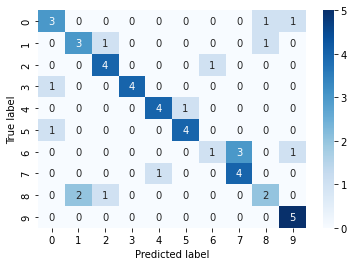

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns     

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# Seaborn heatmeap을 이용하여 화면에 출력하기
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.show()

In [ ]:
#랜덤하게 예측 이미지 출력해보기
shuffle_idx=np.random.permutation(len(X_test))
X_test_shuffle=X_test[shuffle_idx]
y_test_shuffle=y_test[shuffle_idx]

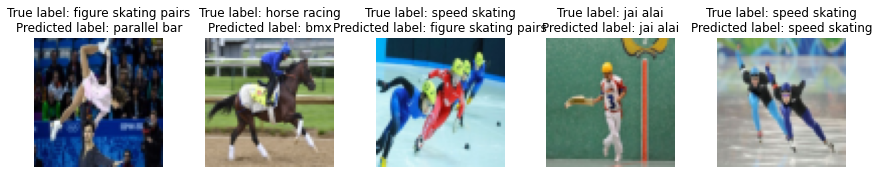

In [ ]:
from skimage.transform import resize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

max_cnt = 5

fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_test_shuffle[:max_cnt], y_test_shuffle[:max_cnt], model.predict(X_test_shuffle[:max_cnt])):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

하이퍼파라미터를 달리해도 좀처럼 성능이 향상되지 않는다.
class가 너무 많아서일까? 아님 검증 데이터가 작아서?
cat dog 데이터로 해보기로 했다.

In [179]:
datapath="./data/catdog/"
train_cat_file_list = os.listdir(datapath + 'training_set/training_set/cats/')
train_dog_file_list = os.listdir(datapath+'training_set/training_set/dogs/')
test_cat_file_list= os.listdir(datapath+'test_set/test_set/cats/')
test_dog_file_list=os.listdir(datapath+'test_set/test_set/dogs/')
print(train_cat_file_list[:5])

['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg']


In [180]:
X_train=[]
y_train=[]

for cat_file in train_cat_file_list:
    if not "jpg" in cat_file:
        continue
    img=Image.open(datapath+'training_set/training_set/cats/'+cat_file)
    img=np.asarray(img)
    img=resize(img,(64,64,3))
    X_train.append(img)
    y_train.append('cat')

for dog_file in train_dog_file_list:
    if not "jpg" in dog_file:
        continue
    img=Image.open(datapath+'training_set/training_set/dogs/'+dog_file)
    img=np.asarray(img)
    img=resize(img,(64,64,3))
    X_train.append(img)
    y_train.append('dog')

X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=[]
y_test=[]

for cat_file in test_cat_file_list:
    if not "jpg" in cat_file:
        continue
    img=Image.open(datapath+'test_set/test_set/cats/'+cat_file)
    img=np.asarray(img)
    img=resize(img,(64,64,3))
    X_test.append(img)
    y_test.append('cat')

for dog_file in test_dog_file_list:
    if not "jpg" in dog_file:
        continue
    img=Image.open(datapath+'test_set/test_set/dogs/'+dog_file)
    img=np.asarray(img)
    img=resize(img,(64,64,3))
    X_test.append(img)
    y_test.append('dog')

X_test=np.array(X_test)
y_test=np.array(y_test)

In [181]:
X_train=np.reshape(X_train,(X_train.shape[0],-1))
X_test=np.reshape(X_test,(X_test.shape[0],-1))

In [182]:
from scipy.ndimage.interpolation import shift


def shift_image(image, dx, dy):
    image = image.reshape((64, 64, 3))
    # dy, dx는 각각 너비, 높이 기준으로 이동할 크기
    shifted_image = shift(image, [dy, dx, 0])
    return shifted_image.reshape([-1])


def horizontal_flip(image):
    image = image.reshape((64, 64, 3))
    # 수직 반전(vertical flip): axis=0, 수평 반전(horizontal flip): axis=1
    flipped_image = np.flip(image, axis=1)
    return flipped_image.reshape([-1])
    
X_train_augmented=[image for image in X_train]
y_train_augmented=[label for label in y_train]

for image,label in zip(X_train,y_train):
    dx=np.random.uniform(1,3)
    dy=np.random.uniform(1,3)
    X_train_augmented.append(shift_image(image,dx,dy))
    y_train_augmented.append(label)
    X_train_augmented.append(horizontal_flip(image))
    y_train_augmented.append(label)

X_train_augmented=np.array(X_train_augmented)
y_train_augmented=np.array(y_train_augmented)

shuffle_idx=np.random.permutation(len(X_train_augmented))
X_train_augmented=X_train_augmented[shuffle_idx]
y_train_augmented=y_train_augmented[shuffle_idx]

In [ ]:
from sklearn.linear_model import LogisticRegression

best_acc=0
best_iter=0
for iter in [10, 30, 50, 100, 200, 300]:
    start_time = time.time() # 시작 시간

    model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
    model.fit(X_train_augmented, y_train_augmented)

    print("====================================================")
    print(f'[학습 완료(max_iter={iter})]')

    y_pred = model.predict(X_train_augmented)
    train_acc = accuracy_score(y_train_augmented, y_pred)
    print('학습 데이터셋 정확도:', train_acc)

    y_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, y_pred)
    print('검증 데이터셋 정확도:', val_acc)
    if best_acc<val_acc:
        best_acc=val_acc
        best_iter=iter
    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

print(best_acc,best_iter)

c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=10)]
학습 데이터셋 정확도: 0.6032896106600042
검증 데이터셋 정확도: 0.5872466633712309
소요된 시간(초 단위): 11.240198850631714


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=30)]
학습 데이터셋 정확도: 0.6381844680408079
검증 데이터셋 정확도: 0.6193771626297578
소요된 시간(초 단위): 19.549965858459473


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=50)]
학습 데이터셋 정확도: 0.6560899437851343
검증 데이터셋 정확도: 0.6198714780029659
소요된 시간(초 단위): 35.90430307388306


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=100)]
학습 데이터셋 정확도: 0.6766604205704768
검증 데이터셋 정확도: 0.6080079090459714
소요된 시간(초 단위): 55.024147510528564


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=200)]
학습 데이터셋 정확도: 0.7020612117426608
검증 데이터셋 정확도: 0.5981216015818092
소요된 시간(초 단위): 114.42893409729004


c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=300)]
학습 데이터셋 정확도: 0.7168852800333125
검증 데이터셋 정확도: 0.6000988630746417
소요된 시간(초 단위): 178.37039041519165
0.6198714780029659 50


In [183]:
model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=50)
model.fit(X_train_augmented, y_train_augmented)

c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50, multi_class='multinomial')

In [184]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.6535915053091818
검증 데이터셋 정확도: 0.625308947108255
클래스: ['cat' 'dog']
반복 횟수: [50]
학습된 가중치 크기: (1, 12288)


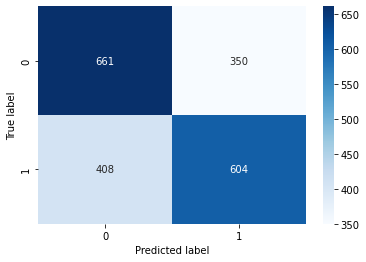

In [185]:
from sklearn.metrics import confusion_matrix
import seaborn as sns     

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# Seaborn heatmeap을 이용하여 화면에 출력하기
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.show()

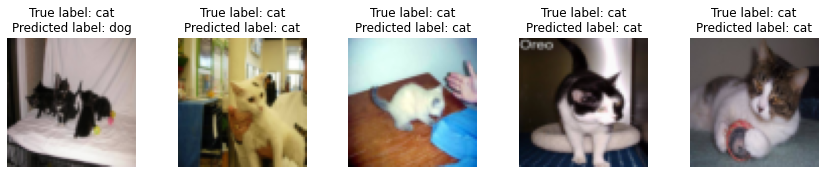

In [188]:
#랜덤하게 예측 이미지 출력해보기
shuffle_idx=np.random.permutation(len(X_test))
X_test_shuffle=X_test[shuffle_idx]
y_test_shuffle=y_test[shuffle_idx]

from skimage.transform import resize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

max_cnt = 5

fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_test_shuffle[:max_cnt], y_test_shuffle[:max_cnt], model.predict(X_test_shuffle[:max_cnt])):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')